ANN models performing addition and multiplication using Python Numpy

# Abstract

Artificial neural networks (ANNs) are a subset of machine learning that are derived from the human brain, and they resemble the way biological neurons communicate with one another. They are the systems with abilities to alter their internal structure in response to function goals. When certain brain connections are stimulated over and over again, it results in human learning. As a result, when given a specific stimulus, our brain is more likely to produce the desired outcome. ANN includes feedback in a similar fashion, in that when the desired result occurs, the connections that create it are reinforced. ANNs may generate the dynamic interplay of multiple components at the same time, allowing for the study of complexity; they can also make individual decisions rather than trends.  

This project is about creating the ANN models that can perform addition and multiplication with two inputs. In this project, we have made two neural networks that adds and multiplies two numbers. We have two inputs, one hidden layer with one node and the output in our neural network models. We have used ReLU(Rectified linear Unit) as the activation function in our neural network. The rectified linear activation function, or ReLU for short, is a piecewise linear function that, if the input is positive, outputs the input directly; else, it outputs zero. The neural models for the addition and multiplication of two numbers are essentially same, the only difference is we input x and y and the output is obtained as c = x+y in addition model whereas in the multiplication model we do logc= logx + logy and we calculate output as exponent of c. We have used only numpy library to bulid these models and matplotlib to plot the graphs.




# Theory

An artificial neural network consists of neurons that are highly computational and consists of mathematics that deals similar to the human brain. Every single part in this system is named as a neuron to perform a specific process which is combined together to perform a new task. Such systems often learn to execute tasks by considering examples rather than being designed with task-specific rules. The Multilayered ANN models are built with added activation function where multiple layers of perceptrons are connected to create a network of perceptrons. Multi-layered consists of the following three important layers:

**Input Layer**: The input layer is used for receiving the inputs for the model.

**Output Layer** : The output layer is used for producing the output from the model.
Hidden Layers: Hidden layers lies in between the input and output layer and where it receives the sets of weights, inputs, and bias and then by the use of the activation function and then passed the output to the output layer. 

The intermediate output from the neural network is calculated as:

**$Y$= $W1X1+W2X2+.....+WnXn + b$** . The actual output is calculated as 
$Output$= $activationFunction(Y)$

However, we have not used bias in our project. 

**Activation Function**:
In a neural network, activation functions deal with turning the weighted sum of the input into the output from nodes or nodes in a layer. For how to use the activation function in the hidden layer, there are several choices that can be chosen.

* Sigmoid: Chosen if the output is between 0 or 1 . The formula of the sigmoid function is :  **$\phi(z)$ = $\frac{1}     {1+e^-z}$**  


* Rectified Linear Unit (ReLu): Chosen by most of the models for its better performance. The formula of the ReLu         function is $R(z)$ = $max(0,z)$ . The derivative of  Rectified Linear Unit (ReLu) function can be calculated as :
  0 𝑖𝑓 𝑥 < 0, 
  1 𝑖𝑓 𝑥 > 0 and 𝑢𝑛𝑑𝑒𝑓𝑖𝑛𝑒𝑑 𝑖𝑓 𝑥 = 0


ANN models are highly based on training data used by neural networks to learn and increase their accuracy over time. Once the models are trained and finalized with good accuracy, then the model can be used as a powerful tool for higher computational problems. Therefore, Learning is the process of adapting to a task considering high accuracy and minimized accuracy over time. In ANN, it is calculated through the use of the cost function, which is calculated during the learning process. 

**Learning Rate**:

Learning rate is the numerical value ranging from 0.0 and 1.0 which controls how the model should adapt to the given weights and inputs to the output. The learning rate is kept as same throughout the whole process.

**Cost Function**:

A cost function, also known as a loss function, is a metric that measures how well a model performs on training data and predicted output. The weights and biases used to determine the output have a significant impact on the cost function. The formula of the cost function is : 

$J$ = $\frac{1}{2} $( h - y )$^2$

**BackPropagation**:

The core of the ANN training is the back-propagation process where the weights are re-assigned in every iteration of the neural networks based on error. The process ensures that the error rates are lowered and the model's accuracy is boosted making the system more reliable.


# Analysis Results & Explanation : 

## 1. ANN Model For Addition of Two Numbers 

In [1]:
#import the required libraries

import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(1)


class Addition_Neural_Network: 

    def __init__(self,  epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    # relu function to normalize inputs
    def relu(self,x):
        return  np.maximum(0, x)

    # relu derivatives to adjust the weights
    def relu_derivative(self,x):
        x = np.where(x < 0, 0, x)
        x = np.where(x >= 0, 1, x)
        return x

    def forward_pass(self,X):
        Net_output= np.dot(X,self.weights)
        Output= self.relu(Net_output)
        return Output
    
    def fit(self,input_training, output_label ):
        self.weights = 2*(np.random.rand(2,1))-1
        print(f'Initial weights are : w1= {self.weights[0]}, w2= {self.weights[1]}')
        error_array= []
        for epoch in range(self.epochs):
            #forward_pass
            Output= self.forward_pass(input_training)

            #Cost/loss/error calculation
            error = 1/2 *np.square(output_label - Output) #error of the forward pass
            if epoch%25==0:
                print(f'At Epoch ({epoch+1}) --->  w1 = {self.weights[0] }, w2= {self.weights[1]},  error = {error.sum():.5f}')     
            error_array.append(error.sum())
            #back_propagation 
            doh1 = self.relu_derivative(Output) # derivative of the relu function with respect to output
            dError = Output - output_label #derivative of the error 
            dz = dError * doh1
            inputs = input_training.T

            #weights update
            self.weights = self.weights - self.learning_rate*np.dot(inputs, dz)
        return error_array
    

### Explanation and Analysis of the ANN model For Addition of Two Numbers

Here, a class/model called Addition_Neural_Network has been made. We have used random number to initialize the weights. As there are two inputs , there are two weights. There are basically four steps involved: Forward Propagation, Cost calculation, Backward Propagation and a further forward propagation. For the forward propagation we have made a function called forward_pass that: 
* finds the dot product of the input data and the initialized weights. 
* pass the output from above to the ReLU function to calculate the final output 

Then, we calculated the cost/error by using the formula 
$J$ = $\frac{1}{2}$( h - y )$^2$ , where h is the target value and y is the real output. 

Now as we have found the error, it's time to backpropagate, calculate the derivative of Error and pass the output to the derivative of ReLU function and multiply them with the input data . 

After backpropagation is done, we have updated the weights by subtracting it with the product of learning rate and the result of backprogation. 

As shown below,for the testing purpose,we have made an object of the model Addition_Neural_Network and  have iterated 500 times to train our model using 20 input numbers and their sum which defined as Numpy array.  We have set the learning_rate to 0.0006 as it gives the accurate output. Finally after it has been trained , it's time to test the model. We have given the input data as 1067 and 765 and passed it to our model. As a result, the model rightly predicts the sum as 1067 + 765 =  1832. 

Therefore, we can pass any two numbers in this model and it will give the sum of those numbers as the output. 


## Testing the model

In [2]:
Addition_NN = Addition_Neural_Network(epochs=500, learning_rate=0.0006)
input_training = np.array([[1,2],[2,4],[6,3],[4,8],[5,10],[6,12], [14,7], [8,16], [18,9], [10,20]])
output_t= input_training.sum(axis=1)
output_label= output_t.reshape(10,1)
print('Training_input_data =\n',input_training)
print('Training_output_data =\n',output_label)

error_array_sum = Addition_NN.fit(input_training,output_label )

test_data = np.array([1067,765])
Sum = Addition_NN.forward_pass(test_data)
print('\nThe result using Neural Network is :')

print(f'{test_data[0]} + {test_data[1]} = ', Sum)  

Training_input_data =
 [[ 1  2]
 [ 2  4]
 [ 6  3]
 [ 4  8]
 [ 5 10]
 [ 6 12]
 [14  7]
 [ 8 16]
 [18  9]
 [10 20]]
Training_output_data =
 [[ 3]
 [ 6]
 [ 9]
 [12]
 [15]
 [18]
 [21]
 [24]
 [27]
 [30]]
Initial weights are : w1= [-0.16595599], w2= [0.44064899]
At Epoch (1) --->  w1 = [-0.16595599], w2= [0.44064899],  error = 1222.99688
At Epoch (26) --->  w1 = [0.97368224], w2= [1.02139769],  error = 0.10121
At Epoch (51) --->  w1 = [0.99838227], w2= [1.00131529],  error = 0.00038
At Epoch (76) --->  w1 = [0.99990056], w2= [1.00008085],  error = 0.00000
At Epoch (101) --->  w1 = [0.99999389], w2= [1.00000497],  error = 0.00000
At Epoch (126) --->  w1 = [0.99999962], w2= [1.00000031],  error = 0.00000
At Epoch (151) --->  w1 = [0.99999998], w2= [1.00000002],  error = 0.00000
At Epoch (176) --->  w1 = [1.], w2= [1.],  error = 0.00000
At Epoch (201) --->  w1 = [1.], w2= [1.],  error = 0.00000
At Epoch (226) --->  w1 = [1.], w2= [1.],  error = 0.00000
At Epoch (251) --->  w1 = [1.], w2= [1.], 

### Error Vs Iteration graph for the training data :

Below is the graph plot between the training iterations for the addition model and the Cost(Error).

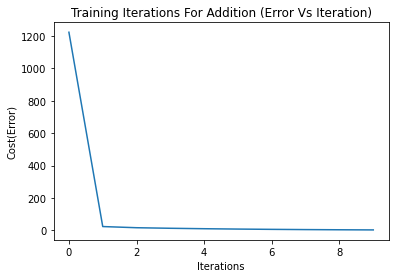

In [16]:

plt.figsize = (30,20)
plt.plot(np.arange(0,10),error_array_sum[0:10])
plt.xlabel('Iterations')
plt.ylabel('Cost(Error)')
plt.title('Training Iterations For Addition (Error Vs Iteration)')
plt.show()

In this graph, we can see the curve where at first iteration/epoch (E=0), the model is trained to a larger extent and the error is also high. But as we iterate in the next step (E=1 or 2 )as we can observe drastic fall in the error. After that there is no significant change in the error and the error remains constant. Since the criterias and the training dataset are less not so complex, the neural network model is mostly trained at the initial iterations. This Artificial Neural Network that does the addition of two numbers has good learning rate based on the figure as shown below. 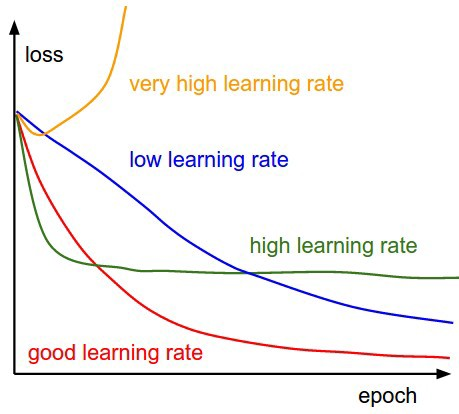


## 2. ANN Model For Multiplication of Two Numbers 

In [17]:
#import the required libraries

import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(1)


class Mutliplication_Neural_Network: 

    def __init__(self,  epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
    
    # relu function to normalize inputs
    def relu(self,x):
        return  np.maximum(0, x)

    # relu derivatives to adjust the weights
    def relu_derivative(self,x):
        x = np.where(x < 0, 0, x)
        x = np.where(x >= 0, 1, x)
        return x

    def forward_pass(self,X):
        log_X= np.log(X)
        Net_output= np.dot(log_X,self.weights)
        self.Output= self.relu(Net_output)
        return np.exp(self.Output) # returning expopnent of the output
    
    def fit(self,input_training, output_label ):
        log_input= np.log(input_training) #taking log of input 
        log_output= np.log(output_label) #taking log of output 
        self.weights = 2*(np.random.rand(2,1))-1
        print(f'Initial weights are : w1= {self.weights[0]}, w2= {self.weights[1]}')
        error_array=[]
        for epoch in range(self.epochs):
            #forward_pass
            self.forward_pass(input_training)

            #Cost/loss/error calculation
            error = 1/2 * np.square(log_output - self.Output)#error of the forward pass
            if epoch%1000==0:
                print(f'At Epoch ({epoch+1}) --->  w1 = {self.weights[0] }, w2= {self.weights[1]},  error = {error.sum():.5f}')     
            error_array.append(error.sum())
            #back_propagation 
            doh1 = self.relu_derivative(self.Output) # derivative of the relu function with respect to output
            dError = self.Output - log_output #derivative of the error 
            dz = dError * doh1
            inputs = log_input.T

            #weights update
            self.weights = self.weights - self.learning_rate*np.dot(inputs, dz)
        return error_array   

### Explanation and Analysis of the ANN model For Multiplication of Two Numbers

Since the neural network calculates the sum of the products of input and weight, we need to think of the way to to make a model that multiplies the two input data. We have already made a model that outputs the sum of two numbers i.e
result = a + b and now we need to make a model where result = a$*$b . 
There is a simple mathematical formula of log :

R= a$*$b => log(R) = log(a) + log(b) which means we can pass the log of input data to Addition_Neural_Network model and it will result the log(result).

So, we can either simply pass the log of input data to our Addition_Neural_Network model and take the exponent of the result given by the model to obtain the desired product of input data or modify the Addition_Neural_Network model to make a new model Mutliplication_Neural_Network that takes the log of inputs and carry out the same process as addition neural network model and then returns the output by applying the exponential function to it. 

Therefore, a class/model called Mutliplication_Neural_Network has been made. We have used random number to initialize the weights. As there are two inputs , there are two weights. The input data has been modified as log(input data). There are basically four steps involved: Forward Propagation, Cost calculation, Backward Propagation and a further forward propagation. For the forward propagation we have made a function called forward_pass that: 
* finds the dot product of the input data and the initialized weights. 
* pass the output from above to the ReLU function to calculate the final output 

Then, we calculated the cost/error by using the formula 
$J$ = $\frac{1}{2}$( h - y )$^2$ , where h is the target value and y is the real output. 

Now as we have found the error, it's time to backpropagate, calculate the derivative of Error and pass the output to the derivative of ReLU function and multiply them with the input data . 

After backpropagation is done, we have updated the weights by subtracting it with the product of learning rate and the result of backprogation. 

The model takes the exponent of the claculated output to return the final output.  

As shown below,for the testing purpose,we have made an object of the model Mutliplication_Neural_Network and  have iterated 25000 times to train our model using 20 input numbers and their product which as defined as Numpy array. We have set the learning_rate to 0.0006 as it gives the accurate output. Finally after it has been trained , it's time to test the model. We have given the input data as 12500 and 5000 and passed it to our model. As a result, the model rightly predicts the product as 12500 * 5000 = 12500000

Therefore, we can pass any two numbers in this model and it will give the product of those numbers as the output. 

In [25]:
Multiplication_NN = Mutliplication_Neural_Network(epochs=25000, learning_rate=0.0006)
input_training = np.array([[1,2],[2,4],[6,3],[4,8],[5,10],[6,12], [14,7], [8,16], [18,9], [10,20]])
output_t= input_training.cumprod(axis=1, dtype=float )
output_label= output_t[:,1:]
print('Input_data =\n',input_training)
print('Output_data =\n',output_label)

error_array_prod= Multiplication_NN.fit(input_training,output_label )

test_data = np.array([2500,5000])
Product = Multiplication_NN.forward_pass(test_data)
print('\nThe result using Neural Network is :')

print(f'{test_data[0]} * {test_data[1]} = ', np.round(Product))  

Input_data =
 [[ 1  2]
 [ 2  4]
 [ 6  3]
 [ 4  8]
 [ 5 10]
 [ 6 12]
 [14  7]
 [ 8 16]
 [18  9]
 [10 20]]
Output_data =
 [[  2.]
 [  8.]
 [ 18.]
 [ 32.]
 [ 50.]
 [ 72.]
 [ 98.]
 [128.]
 [162.]
 [200.]]
Initial weights are : w1= [-0.99977125], w2= [-0.39533485]
At Epoch (1) --->  w1 = [-0.99977125], w2= [-0.39533485],  error = 78.64191
At Epoch (1001) --->  w1 = [0.88571784], w2= [1.10247871],  error = 0.02563
At Epoch (2001) --->  w1 = [0.969046], w2= [1.02775697],  error = 0.00188
At Epoch (3001) --->  w1 = [0.99161593], w2= [1.00751814],  error = 0.00014
At Epoch (4001) --->  w1 = [0.99772912], w2= [1.00203633],  error = 0.00001
At Epoch (5001) --->  w1 = [0.99938492], w2= [1.00055155],  error = 0.00000
At Epoch (6001) --->  w1 = [0.9998334], w2= [1.00014939],  error = 0.00000
At Epoch (7001) --->  w1 = [0.99995488], w2= [1.00004046],  error = 0.00000
At Epoch (8001) --->  w1 = [0.99998778], w2= [1.00001096],  error = 0.00000
At Epoch (9001) --->  w1 = [0.99999669], w2= [1.00000297], 

### Error Vs Iteration graph for the training data :

Below is the graph plot between the training iterations for the multiplication model and the Cost(Error).

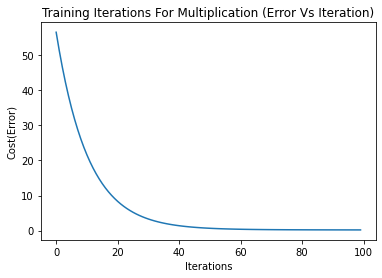

In [24]:

plt.figsize = (50,20)
plt.plot(np.arange(0,100),error_array_prod[0:100])
plt.xlabel('Iterations')
plt.ylabel('Cost(Error)')
plt.title('Training Iterations For Multiplication (Error Vs Iteration)')
plt.show()

In this graph, we can see the curve where at first iteration/epoch (E=0), the model is trained to a larger extent and the error is also high. But as we iterate in the next step (E=1 or 2 )as we can observe drastic fall in the error. After that there is no significant change in the error and the error remains constant. Since the criterias and the training dataset are less not so complex, the neural network model is mostly trained at the initial iterations. This Artificial Neural Network that does the multiplication of two numbers has good learning rate based on the figure as shown below. 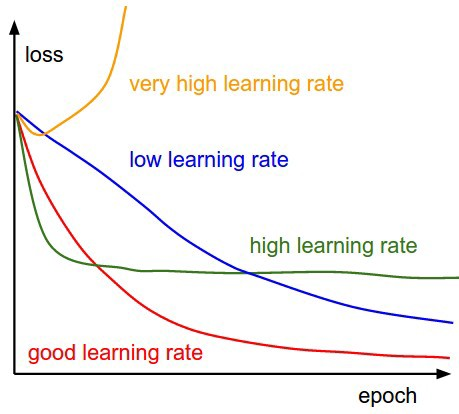


# Conclusion 


The Artificial Neural Network model for the addition and multiplication of two input numbers have been built, explained and analyzed through this project. Two different models namely Addition_Neural_Network and Multiplication_Neural_Network have been made for the addition and multiplication of input numbers respectively. The analysis also contains Cost-Iteration graph in order to visualize fall of cost/error (learning rate of neural network) through each iteartion and both of the models are found to be running at good learning rate. Therefore,these Artificial Neural Network model have been built, trained and evaluated. The results have been verified for many different testing inputs and we have been able to make the addition and multiplication Neural Network Model with 100% accuracy. 
